<a href="https://colab.research.google.com/github/chathu14/Nonlinear_and_Data_Driven_Estimation/blob/main/ME793_Project_phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
pip install control

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

np.random.seed(1)

# System Model

$$
\ddot\theta = [C_M(\theta) - b^* \dot \theta - k^* (\theta -\theta_0)]/I^*
$$
$$
y = C_M(\theta)
$$

State space Model:

$$
\begin{bmatrix}
    \dot x_1 \\
    \dot x_2
\end{bmatrix}
=
\begin{bmatrix}
    0 & 1 \\
    \frac{-k^*}{I*} & \frac{-b^*}{I^*}
\end{bmatrix}
\begin{bmatrix}
    x_1 \\ x_2
\end{bmatrix}
+
\begin{bmatrix}
    0 \\
    \frac{1}{I^*}(C_M(\theta)+k^* \theta_0)
\end{bmatrix} U
$$
$$
y=
\begin{bmatrix}
    1 & 0
\end{bmatrix}
\begin{bmatrix}
    \theta \\ \dot \theta
\end{bmatrix}$$

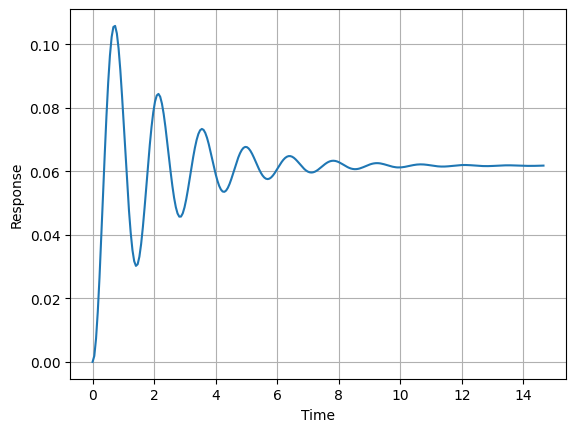

<LinearIOSystem:sys[512]:['u[0]']->['y[0]']>

In [46]:
# Defining variables
Is = 4.1
bs = 3.865
Ks = 80.93
Thetadot = 0  # Taking equilibrium angular position as 0 degrees

# C_M as a function of theta
def calculate_C_M(theta):
    N = 5 # Normal force
    W = 10 # Axial force
    return N * np.cos(theta) - W * np.sin(theta)

# State space model
A = np.array([[0, 1], [-Ks / Is, -bs / Is]])
B = np.array([[0], [(C_M_equilibrium+Ks*Thetadot) / Is]])
C = np.array([[1, 0]])
D = np.array([[0]])

sys = ctrl.ss(A, B, C, D)

time = np.linspace(0, 14, 100)
time, response = ctrl.step_response(sys)

plt.plot(time, response)
plt.xlabel('Time')
plt.ylabel('Response')
plt.grid(True)
plt.show()

sys

# Checking Controllability & Observability of the System

In [47]:
# Checking controllability & observability
controllability_matrix = ctrl.ctrb(sys.A, sys.B)
controllability_rank = np.linalg.matrix_rank(controllability_matrix)
print(f'Controllability Rank: {controllability_rank}')

if controllability_rank>=2:
  print(f'System is controllable')
else  :
  print(f'system is not controllable')

observability_matrix = ctrl.obsv(sys.A, sys.C)
observability_rank = np.linalg.matrix_rank(observability_matrix)
print(f'Observability Rank: {observability_rank}')

if observability_rank>=2:
  print(f'System is observable')
else  :
  print(f'system is not observable')

Controllability Rank: 2
System is controllable
Observability Rank: 2
System is observable


# Adding normal (gaussian) noise

In [51]:
# Adding Gaussian (normal) random variable

noise_mean = 0
noise_std = 0.005

disturbance_input = np.random.normal(noise_mean, noise_std, len(time))


noisy_response = response+disturbance_input

In [52]:
def plot_tme(time, true, measured, estimated=None): #plotting
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)

    ax.plot(time, true, '--', color='black', label='y true')
    ax.plot(time, measured, '*', color='blue', label='y measured')

    if estimated is not None:
        ax.plot(time, estimated, color='red')

    ax.set_xlabel('Time')
    ax.set_ylabel('Measurements or State')

    ax.legend()

    return ax

<Axes: xlabel='Time', ylabel='Measurements or State'>

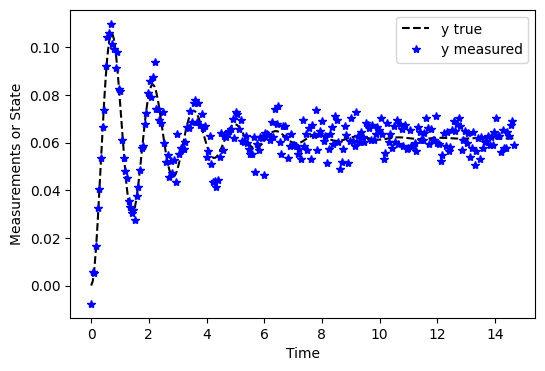

In [53]:
plot_tme(time, response, noisy_response)